#### Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style("darkgrid")

#### Wczytanie zbioru danych

In [2]:
df = pd.read_excel("../Tabela 1.xlsx")

In [3]:
df.head()

,Name,Exposure,class,Chemical,SEX (M/F),Gen1,Gen2,Gen3,Gen4,Gen5,...,Gen2971,Gen2972,Gen2973,Gen2974,Gen2975,Gen2976,Gen2977,Gen2978,Gen2979,Gen2980
0,Sample1,Control,C(M),Control,M,1.126636,0.982482,0.965753,0.795236,1.093474,...,1.943480,2.059138,0.560137,1.073068,1.864937,0.949825,2.004953,1.894345,1.801144,2.116696
1,Sample2,Control,C(M),Control,M,1.102942,0.792857,0.842533,0.704507,0.803609,...,1.933369,1.939796,1.226766,1.118514,1.815777,0.846754,1.921322,1.782817,1.704406,2.068778
2,Sample3,Control,C(M),Control,M,1.129240,0.989232,0.974295,0.771200,0.970926,...,1.919848,2.077602,1.084620,1.089832,1.825995,1.043954,1.998114,1.845221,1.728693,2.097107
3,Sample4,Control,C(M),Control,M,1.100176,1.010291,0.802952,0.696876,0.617705,...,1.941300,2.034530,1.401092,1.067069,1.814479,0.860357,2.041024,1.772065,1.633040,2.052009
4,Sample5,Control,C(M),Control,M,1.052659,1.033912,0.697614,1.229266,0.642373,...,1.933198,1.920972,0.971900,1.132778,1.831693,0.872452,1.849572,1.798413,1.777406,1.989491


#### Analiza HCA

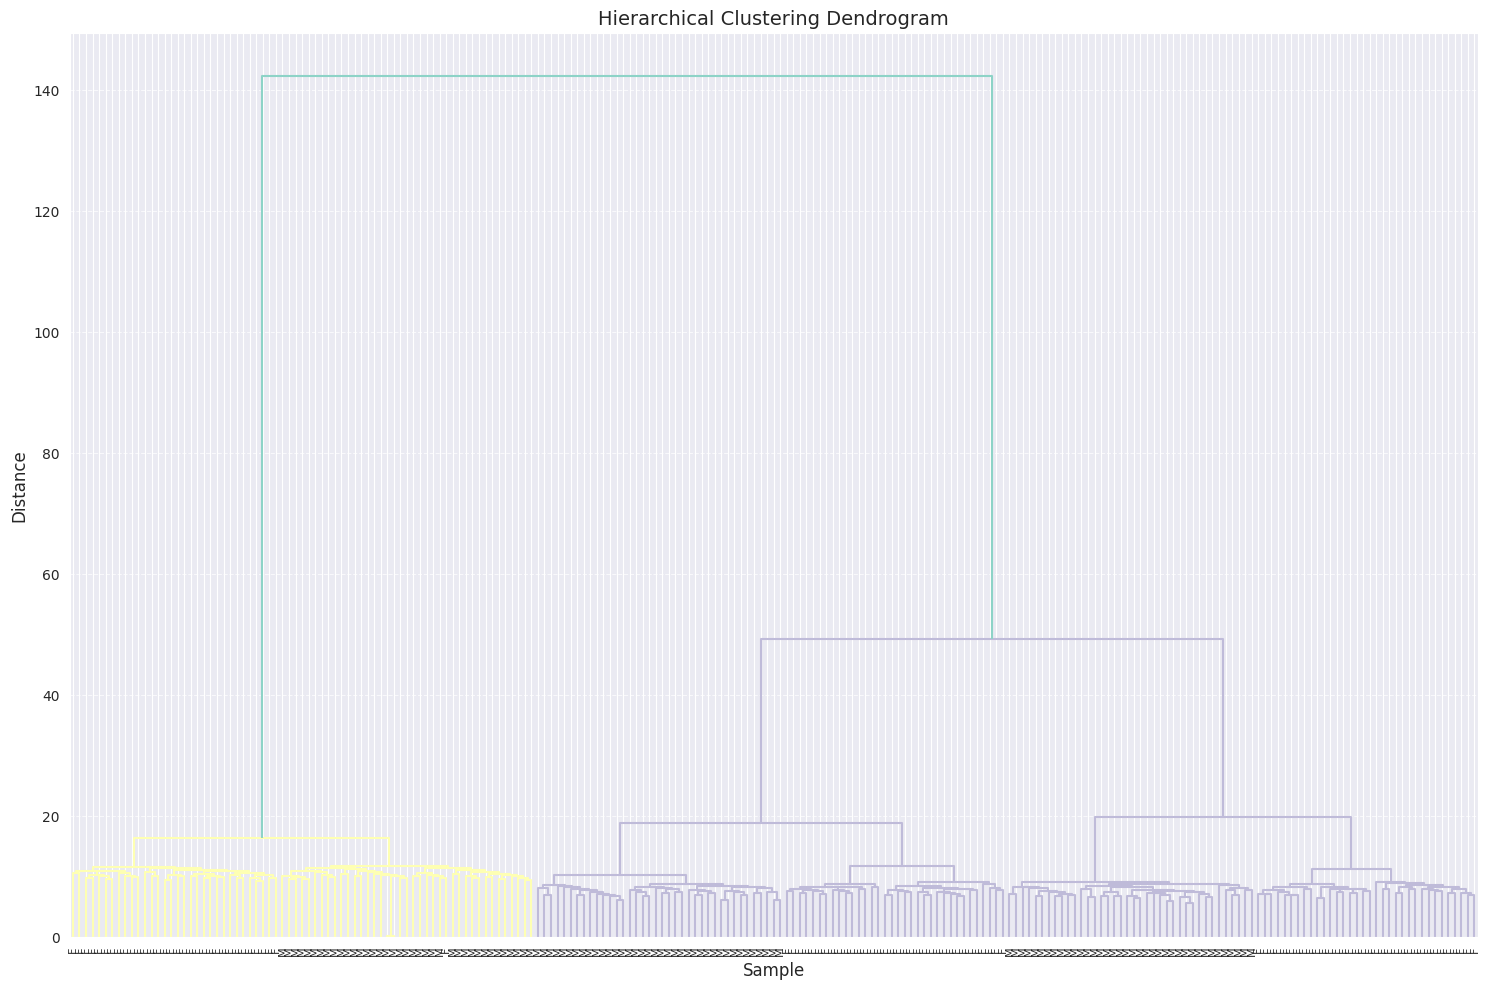

In [8]:
# Prepare data for clustering (exclude non-numeric columns)
data_for_clustering = df.select_dtypes(include=['float64'])

# Compute the linkage matrix
linkage_matrix = hierarchy.linkage(data_for_clustering, method='ward', metric='euclidean')

# Create figure with larger size
plt.figure(figsize=(15, 10))

# Create dendrogram with improved formatting
dendrogram = hierarchy.dendrogram(
    linkage_matrix, 
    leaf_rotation=90,
    leaf_font_size=8,
    labels=df['SEX (M/F)'].values,
    orientation='top'  # Put labels at the bottom
)

plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Increase bottom margin to give more space for labels
plt.subplots_adjust(bottom=0.25)

# Make the plot more readable
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

#### Odcięcie drzewa na 0.7 wysokości

Number of clusters at 70% threshold: 2

Samples per cluster:
Cluster
1     71
2    144
Name: count, dtype: int64


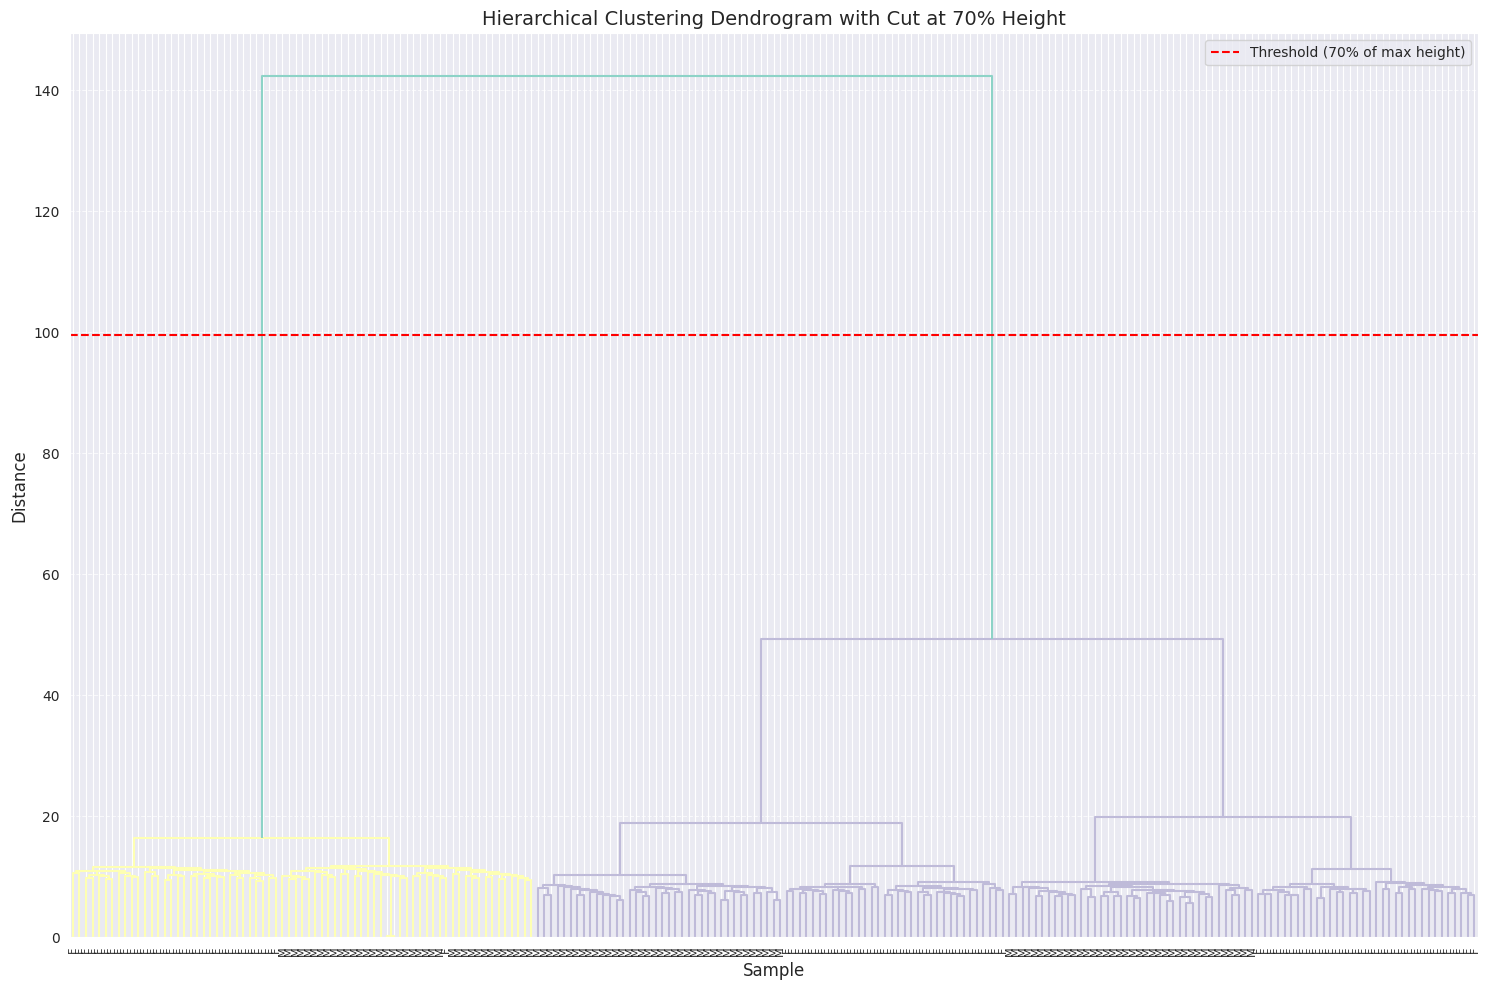

In [9]:
# Calculate the maximum height (distance) in the dendrogram
max_height = max(linkage_matrix[:, 2])
threshold_height = 0.7 * max_height

# Cut the tree at 70% of the maximum height
clusters = hierarchy.fcluster(linkage_matrix, t=threshold_height, criterion='distance')

# Get number of clusters
num_clusters = len(np.unique(clusters))
print(f"Number of clusters at 70% threshold: {num_clusters}")

# Create a new figure
plt.figure(figsize=(15, 10))

# Plot the dendrogram with a horizontal line showing the cut
dendrogram = hierarchy.dendrogram(
    linkage_matrix,
    leaf_rotation=90,
    leaf_font_size=8,
    labels=df['SEX (M/F)'].values,
    orientation='top',
    color_threshold=threshold_height  # Colors clusters below the threshold
)

# Add a horizontal line at the threshold
plt.axhline(y=threshold_height, color='r', linestyle='--', label=f'Threshold (70% of max height)')

plt.title('Hierarchical Clustering Dendrogram with Cut at 70% Height', fontsize=14)
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.legend()

# Increase bottom margin for labels
plt.subplots_adjust(bottom=0.25)

# Make the plot more readable
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Create a dataframe with cluster assignments
cluster_df = pd.DataFrame({
    'Exposure': df['Exposure'],
    'Cluster': clusters
})

# Count samples per cluster
cluster_counts = cluster_df['Cluster'].value_counts().sort_index()
print("\nSamples per cluster:")
print(cluster_counts)

Wyniki analizy HCA wskazują na to, że jest istotna różnica pomiędzy samcami i samicami. Obie grupy tworzą osobne klastry z jednym wyjątkiem widocznym w grupie kontrolnej.